IMPORTING MODULES

IMPORTING MODULES

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score

TAKING THE DATA

In [54]:
c=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

GETTING THE INFORMATION ABOUT DATA

In [55]:
c.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [56]:
c.shape

(7043, 21)

In [57]:
c.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
print(c.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [60]:
c.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [61]:
c.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CHECKING FOR MISSING AND DUPLICATE VALUES

In [62]:
c.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
len(c[c.duplicated()])

0

In [64]:
#printing churn values
c['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [65]:
100*c['Churn'].value_counts()/len(c['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [66]:
#max tenure
c['tenure'].max()

72

In [67]:
#grouping the tenure
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
c['tenure_group']=pd.cut(c.tenure,range(1,80,12),right=False,labels=labels)
print(c)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [68]:
print(c['tenure_group'].value_counts())

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64


In [69]:
c=c.drop('tenure_group',axis=1)

In [70]:
c=c.drop('customerID',axis=1)

In [71]:
print(c)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

EXPLORATORY DATA ANALYSIS

In [72]:
c.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen , tenure and MonthlyCharges are in float so described whereas others in object. SeniorCitizen is categorical hence no proper value for 25%-50%-75%. 75% customer has tenure less than 55 months

Text(0.5, 1.02, 'Count of target variable per category')

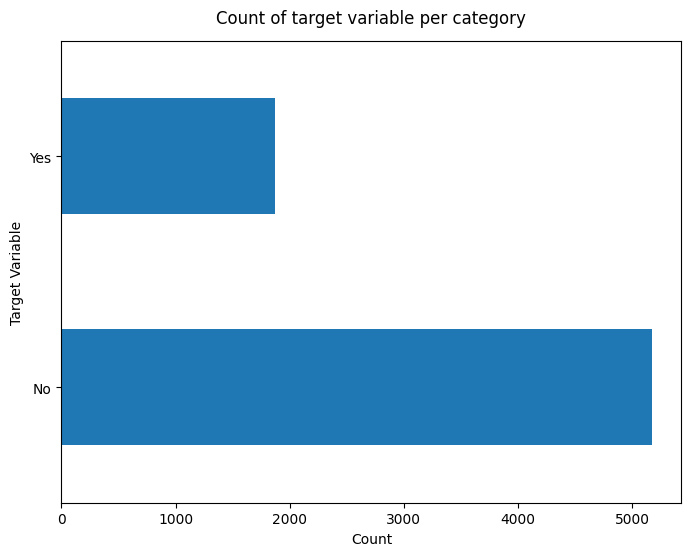

In [73]:
c['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of target variable per category",y=1.02)

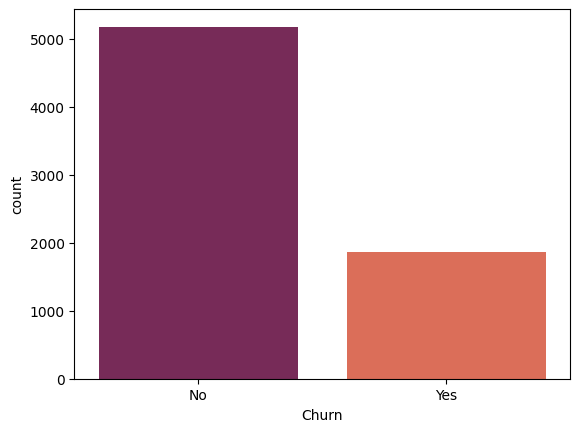

In [74]:
sns.countplot(x=c['Churn'],palette='rocket')
plt.show()

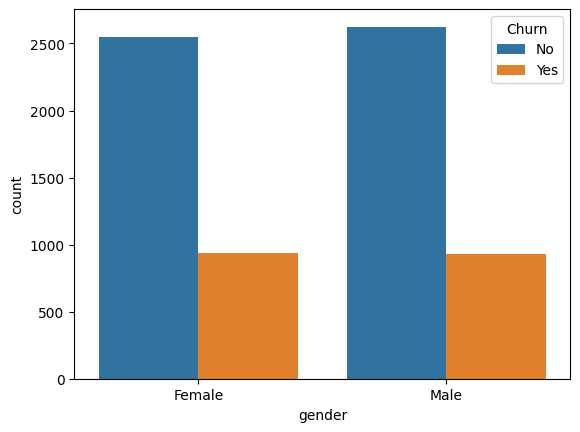

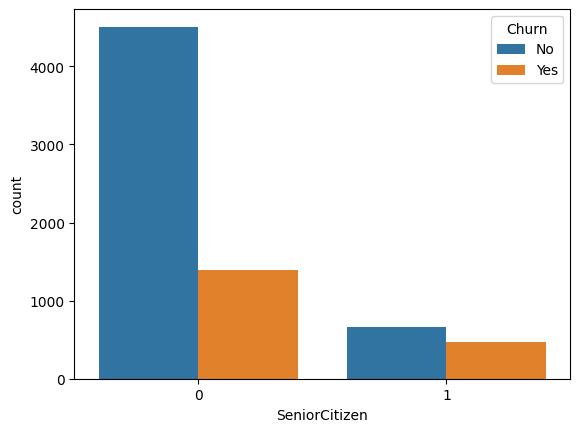

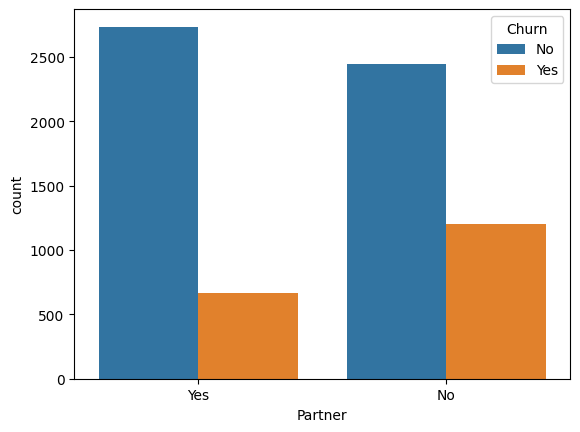

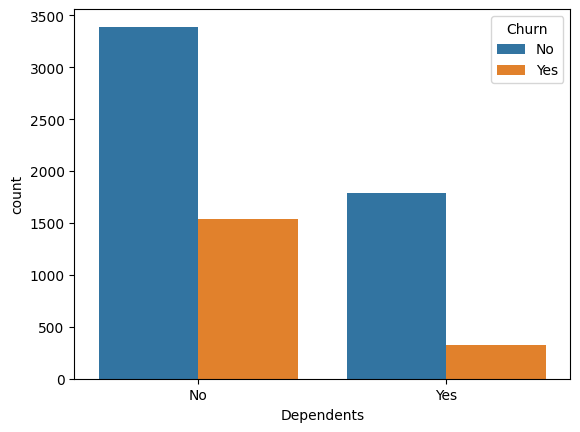

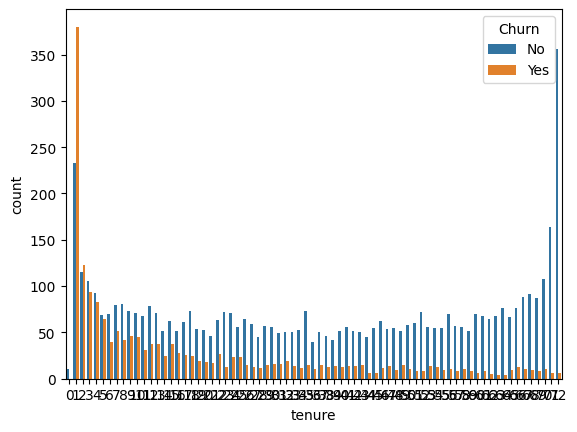

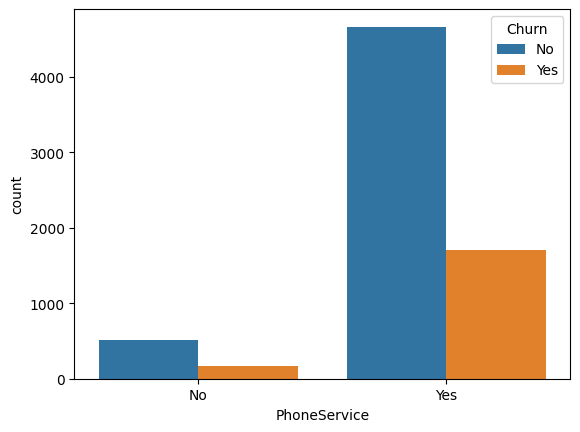

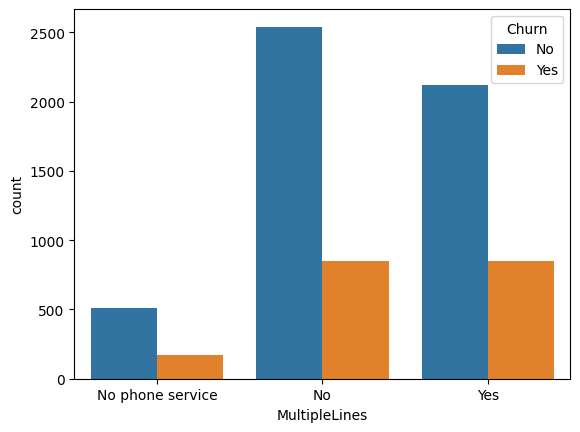

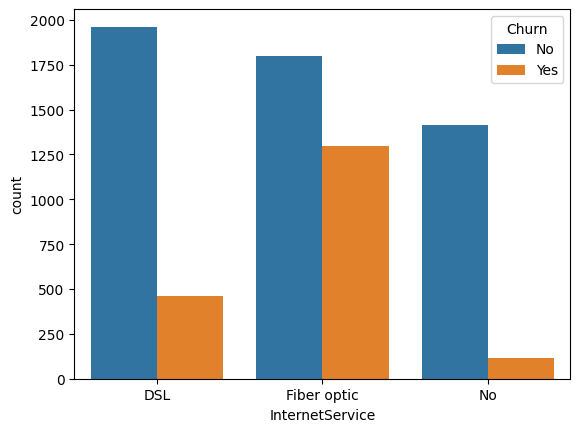

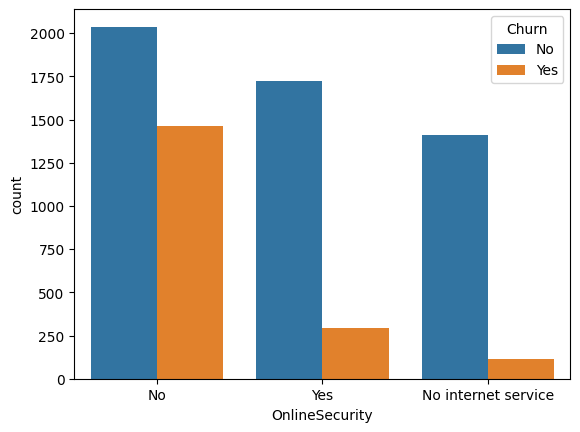

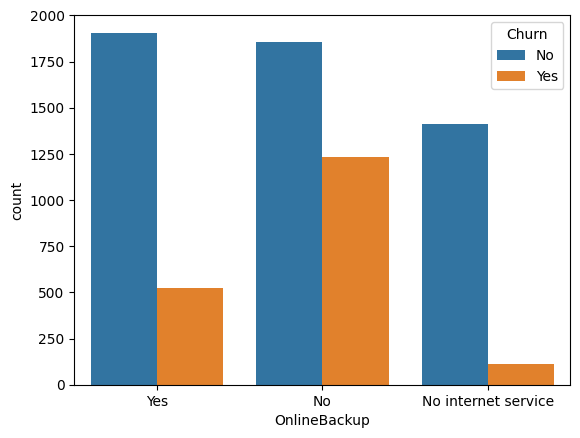

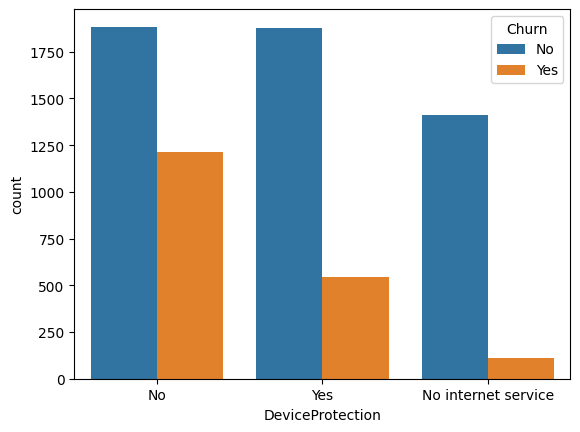

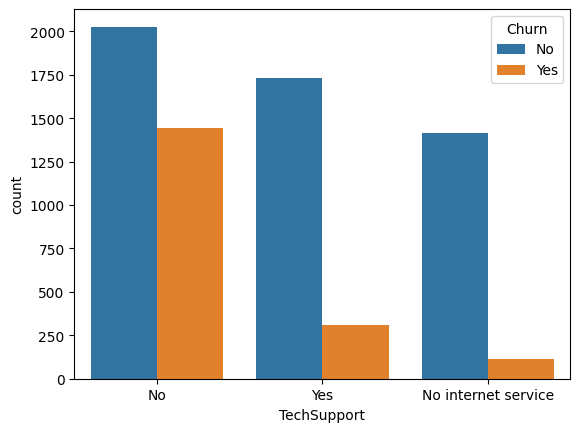

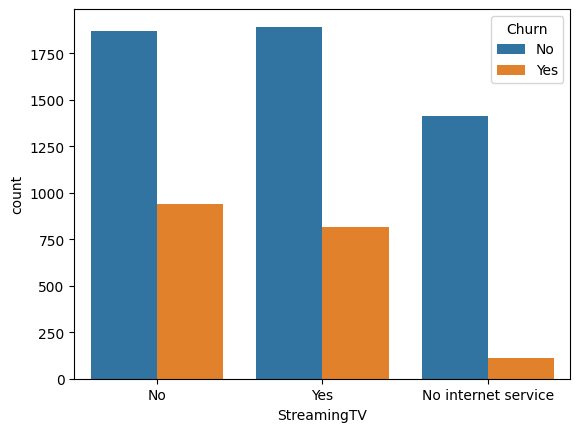

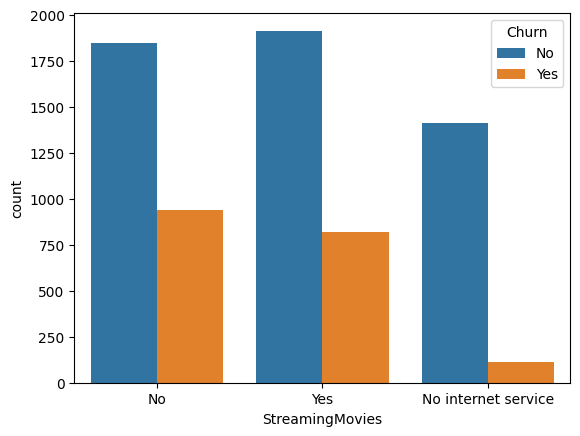

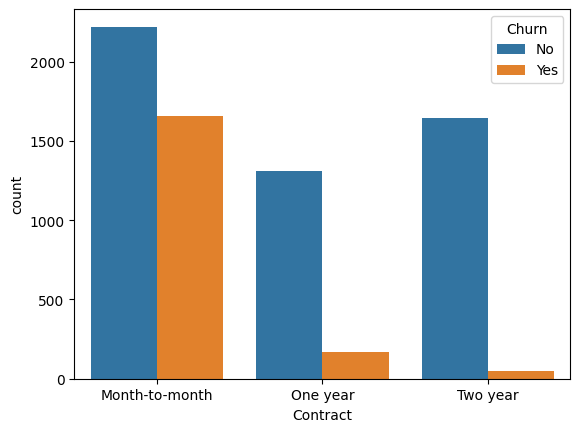

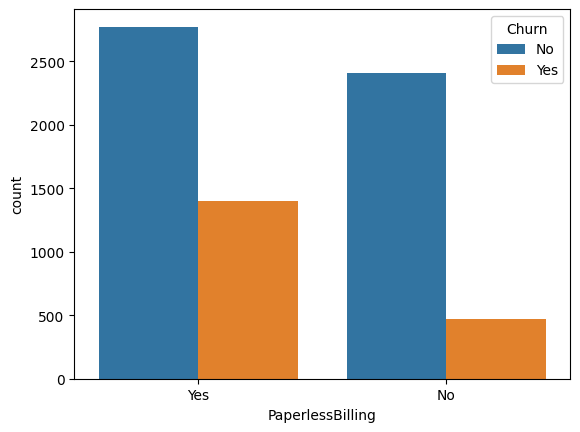

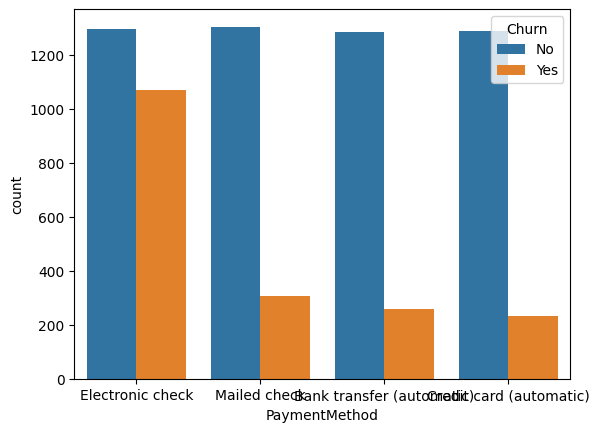

In [75]:
for i, predictor in enumerate(c.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=c,x=predictor,hue='Churn')

OUTLIERS CHECK

<Axes: xlabel='MonthlyCharges'>

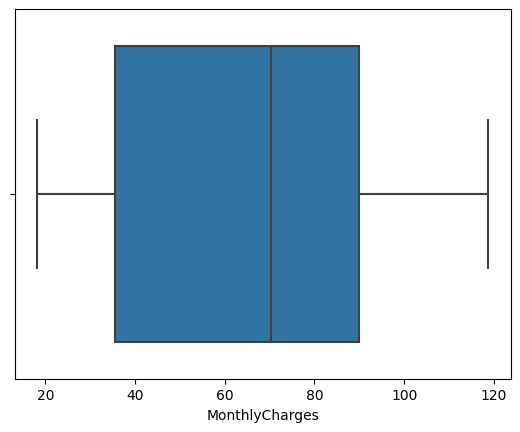

In [76]:
sns.boxplot(x=c['MonthlyCharges'])

<Axes: xlabel='tenure'>

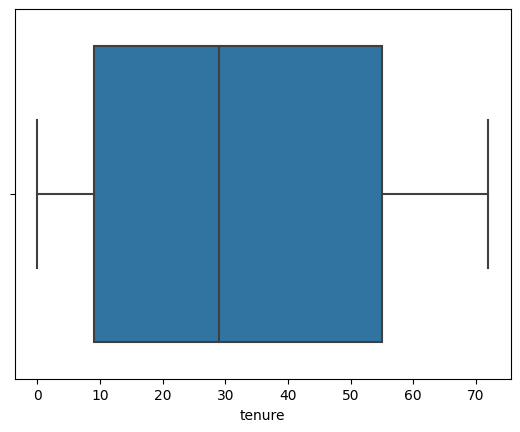

In [77]:
sns.boxplot(x=c['tenure'])

CONVERTING TARGET VARIABLE CHURN INTO A BINARY VALUE

In [78]:
from sklearn.preprocessing import LabelEncoder
for column in c.columns:
    if c[column].dtype==np.number:
        continue
    c[column]=LabelEncoder().fit_transform(c[column])

C:\Users\soumi\AppData\Local\Temp\ipykernel_8084\3174361644.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if c[column].dtype==np.number:
C:\Users\soumi\AppData\Local\Temp\ipykernel_8084\3174361644.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if c[column].dtype==np.number:
C:\Users\soumi\AppData\Local\Temp\ipykernel_8084\3174361644.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if c[column].dtype==np.number:
C:\Users\soumi\AppData\Local\Temp\ipykernel_8084\3174361644.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if c[column].dtype==np.number:
C:\U

In [79]:
print(c)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [80]:
c.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [81]:
c.shape

(7043, 20)

c:\Users\soumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


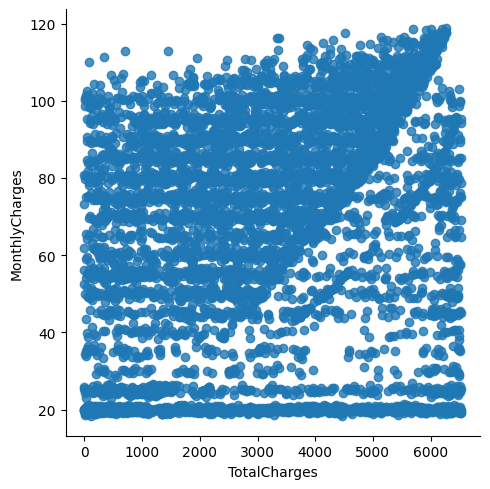

In [82]:
sns.lmplot(data=c,x="TotalCharges",y="MonthlyCharges",fit_reg=False)

<Axes: xlabel='Churn', ylabel='tenure'>

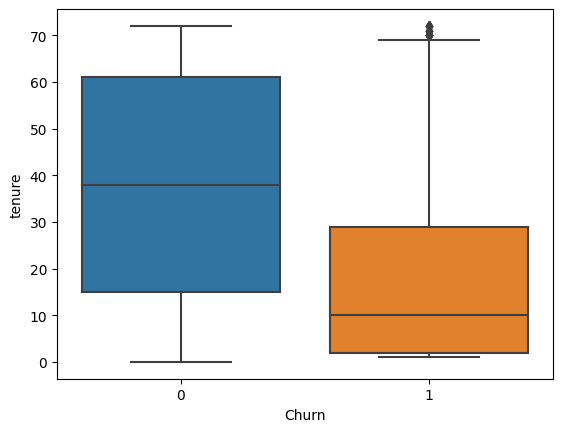

In [83]:
sns.boxplot(x = c.Churn, y = c.tenure)

insight:MonthlyCharges increases as TotalCharges increases

C:\Users\soumi\AppData\Local\Temp\ipykernel_8084\970602357.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  m=sns.kdeplot(c.MonthlyCharges[(c['Churn']== 0)],color='Red',shade=True)
C:\Users\soumi\AppData\Local\Temp\ipykernel_8084\970602357.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  m=sns.kdeplot(c.MonthlyCharges[(c['Churn']== 1)],ax=m,color='Blue',shade=True)


Text(0.5, 1.0, 'Monthly charges by churn')

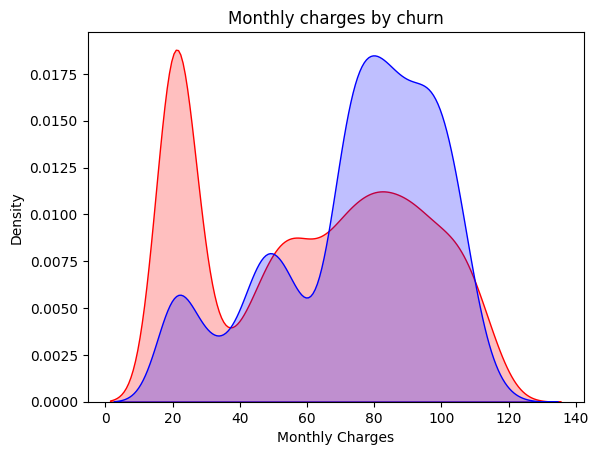

In [84]:
m=sns.kdeplot(c.MonthlyCharges[(c['Churn']== 0)],color='Red',shade=True)
m=sns.kdeplot(c.MonthlyCharges[(c['Churn']== 1)],ax=m,color='Blue',shade=True)
m.set_ylabel('Density')
m.set_xlabel('Monthly Charges')
m.set_title('Monthly charges by churn')

insight:Churn is high when monthly charges are high

C:\Users\soumi\AppData\Local\Temp\ipykernel_8084\1847678242.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  m1=sns.kdeplot(c.TotalCharges[(c['Churn']== 0)],color='Red',shade=True)
C:\Users\soumi\AppData\Local\Temp\ipykernel_8084\1847678242.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  m1=sns.kdeplot(c.TotalCharges[(c['Churn']== 1)],ax=m1,color='Blue',shade=True)


Text(0.5, 1.0, 'Total Charges by churn')

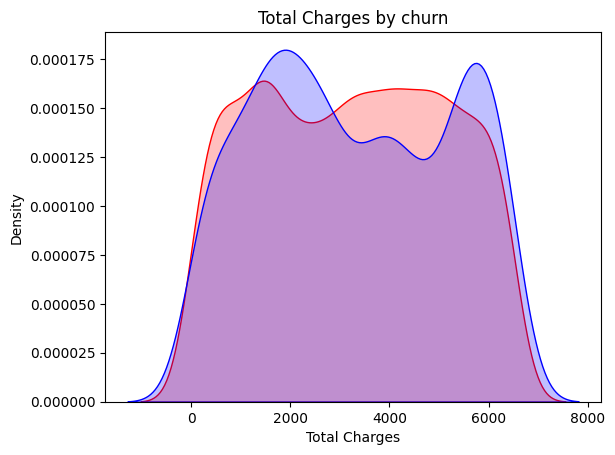

In [85]:
m1=sns.kdeplot(c.TotalCharges[(c['Churn']== 0)],color='Red',shade=True)
m1=sns.kdeplot(c.TotalCharges[(c['Churn']== 1)],ax=m1,color='Blue',shade=True)
m1.set_ylabel('Density')
m1.set_xlabel('Total Charges')
m1.set_title('Total Charges by churn')

insight:high churn at low total charges

CORRELATION OF ALL PREDICTORS WITH CHURN

<Axes: >

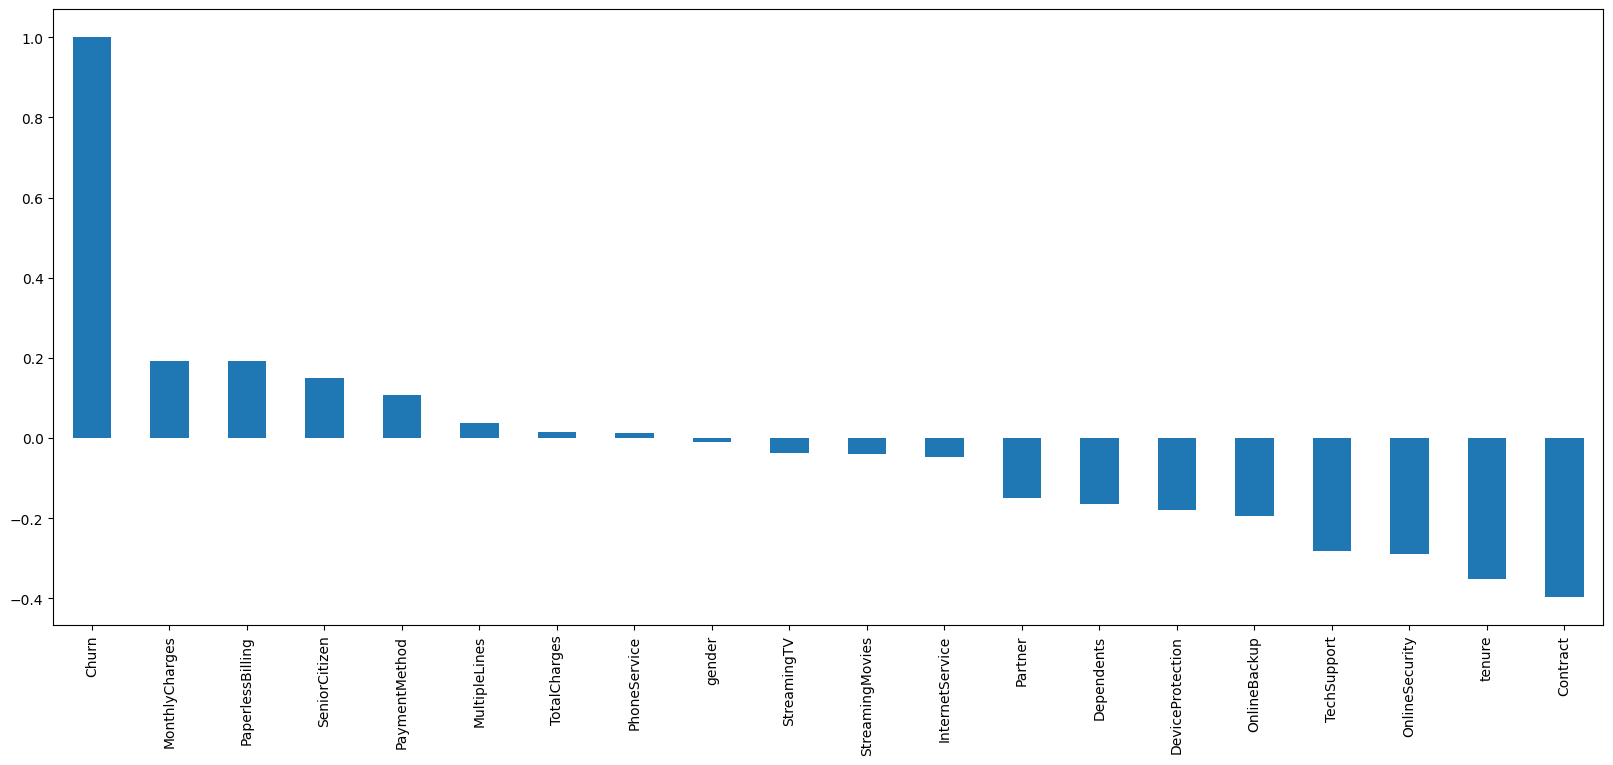

In [86]:
plt.figure(figsize=(20,8))
c.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

THROUGH HEATMAP

<Axes: >

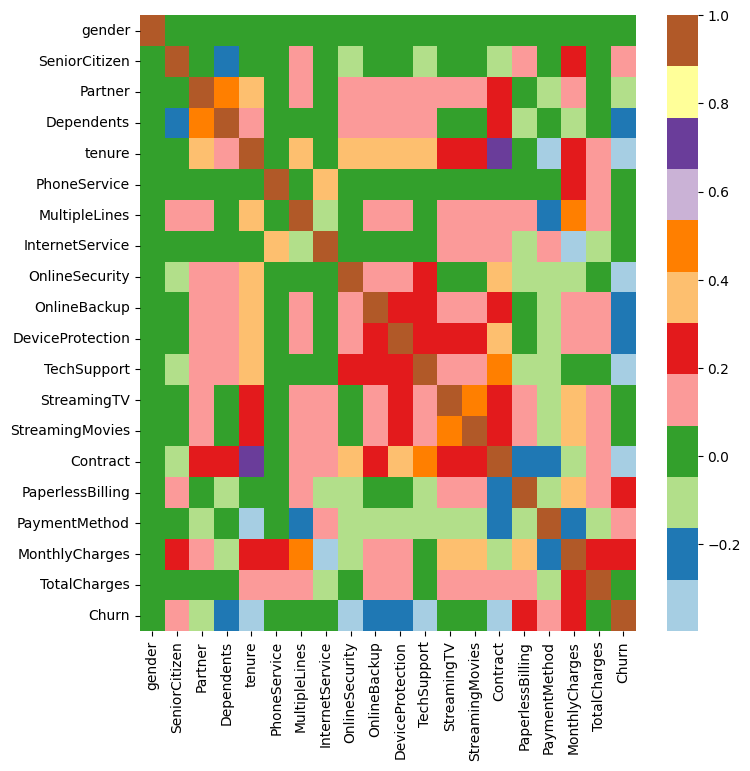

In [87]:
plt.figure(figsize=(8,8))
sns.heatmap(c.corr(),cmap='Paired')

SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [88]:
from sklearn.model_selection import train_test_split
x = c.drop('Churn', axis=1)
y = c['Churn']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=0)

In [89]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2920 to 2732
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   int32  
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   int32  
 3   Dependents        5634 non-null   int32  
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   int32  
 6   MultipleLines     5634 non-null   int32  
 7   InternetService   5634 non-null   int32  
 8   OnlineSecurity    5634 non-null   int32  
 9   OnlineBackup      5634 non-null   int32  
 10  DeviceProtection  5634 non-null   int32  
 11  TechSupport       5634 non-null   int32  
 12  StreamingTV       5634 non-null   int32  
 13  StreamingMovies   5634 non-null   int32  
 14  Contract          5634 non-null   int32  
 15  PaperlessBilling  5634 non-null   int32  
 16  PaymentMethod     5634 non-null   int32  
 1

In [90]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 5634 entries, 2920 to 2732
Series name: Churn
Non-Null Count  Dtype
--------------  -----
5634 non-null   int32
dtypes: int32(1)
memory usage: 66.0 KB


In [91]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1409 entries, 2200 to 3065
Series name: Churn
Non-Null Count  Dtype
--------------  -----
1409 non-null   int32
dtypes: int32(1)
memory usage: 16.5 KB


In [92]:
print(x_train.shape)
print(x_test.shape)

(5634, 19)
(1409, 19)


MODEL

In [98]:
clf_forest = GradientBoostingClassifier()
clf_forest.fit(x_train, y_train)

GradientBoostingClassifier()

In [100]:
#accuracy calculation on training dataset
pred = clf_forest.predict(x_train)
accuracy_score(y_train, pred)

0.8315583954561591

In [102]:
#accuracy calculation on testing dataset
pred_test = clf_forest.predict(x_test)
accuracy_score(y_test, pred_test)

0.7920511000709723

CONFUSION MATRIX

In [103]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values
actual = y_test
# predicted values
predicted = pred_test

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[187 181]
 [112 929]]
Outcome values : 
 187 181 112 929
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.51      0.56       368
           0       0.84      0.89      0.86      1041

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



EVALUATION

In [104]:
y_true = y_test
y_pred = pred_test
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[929, 112],
       [181, 187]], dtype=int64)

In [105]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7920511000709723

In [106]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

array([0.89241114, 0.50815217])

In [107]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

array([0.83693694, 0.62541806])

In [108]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average=None)

array([0.86378429, 0.56071964])